<div align="center">
    <h1><strong>Análisis Modal 2D</strong></h1>
    <h2>Juan David Argüello Plata</h2>
    <img src="Images/uis.png" style="width: 300px;" />
</div>

## __1. Planteamiento del Problema__

<div align="justify">
    Se busca analizar, mediante métodos <i>analíticos</i> y <i>numéricos</i>, el comportamiento modal de la barra mostrada en la Figura 1.
</div>

<br>

<div align="center">
    <img src="Images/Esquema/Esquema.png" style="width: 500px;" />
</div>

<div align="center">
    <i>Figura 1.</i> Geometría del problema.
</div>

<div align="justify">
    Los propiedades del material se pueden especificar a continuación.
</div>

In [5]:
data = {
    'Geometría': {
        'a': {
            'Valor':10,
            'Units': 'm'
        },
        'h': {
            'Valor': 10,
            'Units': 'm'
        },
        'r': {
            'Valor': 2,
            'Units': 'm'
        }
    },
    'Propiedades': {
        'E': {
            'Valor': 200E6,
            'Units': 'MPa'
        },
        'v': {
            'Valor': 0.3,
            'Units': ''
        }
    }
}

from IPython.display import HTML, display
for c in data:
    for d in data[c]: 
        if d != 'v':
            text = '$' + d + '= ' + str(data[c][d]['Valor']) + '\left[' + data[c][d]['Units'] + '\\right]$'
        else:
            text = '$' + d + '= ' + str(data[c][d]['Valor']) + '' + data[c][d]['Units'] + '$'
        display(HTML(text))

## __2. Solución Analítica__

<div align="justify">
    El problema
</div>

## __3. Solución Numérica__

<div align="justify">
    La geomtería dada es la siguiente:
</div>

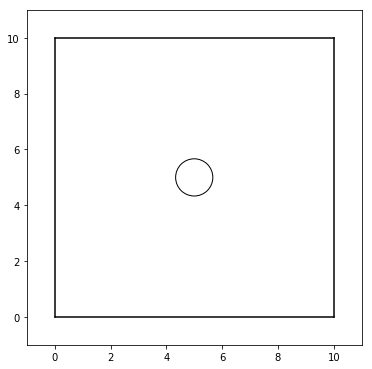

In [2]:
%matplotlib inline
from App.Preprocessing.Geometry import *
Geo(data['Geometría'])

<div align="justify">
    Se inicia realizando la discretización del dominio.
</div>

In [2]:
from App.Preprocessing.Mesh import Malla


ImportError: cannot import name 'Malla' from 'App.Preprocessing.Mesh' (unknown location)

In [3]:
import numpy
from stl import mesh

# Or creating a new mesh (make sure not to overwrite the `mesh` import by
# naming it `mesh`):
VERTICE_COUNT = 100
data = numpy.zeros(VERTICE_COUNT, dtype=mesh.Mesh.dtype)
your_mesh = mesh.Mesh(data, remove_empty_areas=False)

# The mesh normals (calculated automatically)
your_mesh.normals
# The mesh vectors
your_mesh.v0, your_mesh.v1, your_mesh.v2
# Accessing individual points (concatenation of v0, v1 and v2 in triplets)
assert (your_mesh.points[0][0:3] == your_mesh.v0[0]).all()
assert (your_mesh.points[0][3:6] == your_mesh.v1[0]).all()
assert (your_mesh.points[0][6:9] == your_mesh.v2[0]).all()
assert (your_mesh.points[1][0:3] == your_mesh.v0[1]).all()

your_mesh.save('new_stl_file.stl')

/home/cfd/.local/lib/python3.5/site-packages/ipykernel_launcher.py:69: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead


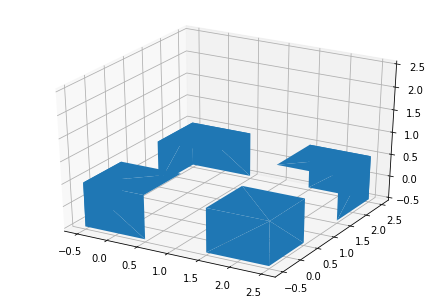

In [5]:
from stl import mesh
import math
import numpy

# Create 3 faces of a cube
data = numpy.zeros(6, dtype=mesh.Mesh.dtype)

# Top of the cube
data['vectors'][0] = numpy.array([[0, 1, 1],
                                  [1, 0, 1],
                                  [0, 0, 1]])
data['vectors'][1] = numpy.array([[1, 0, 1],
                                  [0, 1, 1],
                                  [1, 1, 1]])
# Front face
data['vectors'][2] = numpy.array([[1, 0, 0],
                                  [1, 0, 1],
                                  [1, 1, 0]])
data['vectors'][3] = numpy.array([[1, 1, 1],
                                  [1, 0, 1],
                                  [1, 1, 0]])
# Left face
data['vectors'][4] = numpy.array([[0, 0, 0],
                                  [1, 0, 0],
                                  [1, 0, 1]])
data['vectors'][5] = numpy.array([[0, 0, 0],
                                  [0, 0, 1],
                                  [1, 0, 1]])

# Since the cube faces are from 0 to 1 we can move it to the middle by
# substracting .5
data['vectors'] -= .5

# Generate 4 different meshes so we can rotate them later
meshes = [mesh.Mesh(data.copy()) for _ in range(4)]

# Rotate 90 degrees over the Y axis
meshes[0].rotate([0.0, 0.5, 0.0], math.radians(90))

# Translate 2 points over the X axis
meshes[1].x += 2

# Rotate 90 degrees over the X axis
meshes[2].rotate([0.5, 0.0, 0.0], math.radians(90))
# Translate 2 points over the X and Y points
meshes[2].x += 2
meshes[2].y += 2

# Rotate 90 degrees over the X and Y axis
meshes[3].rotate([0.5, 0.0, 0.0], math.radians(90))
meshes[3].rotate([0.0, 0.5, 0.0], math.radians(90))
# Translate 2 points over the Y axis
meshes[3].y += 2


# Optionally render the rotated cube faces
from matplotlib import pyplot
from mpl_toolkits import mplot3d

# Create a new plot
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)

# Render the cube faces
for m in meshes:
    axes.add_collection3d(mplot3d.art3d.Poly3DCollection(m.vectors))

# Auto scale to the mesh size
scale = numpy.concatenate([m.points for m in meshes]).flatten(-1)
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()